In [16]:
import pandas as pd

In [17]:
df = pd.read_csv(r"C:\Users\Sanjeevi\Downloads\Zomato_Data_Analysis.csv")

In [18]:
df.head()

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cost (in INR),Country
0,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,No,No,No,3,4.8,Dark Green,Excellent,314,6831.0,Phillipines
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,No,No,No,3,4.5,Dark Green,Excellent,591,7452.0,Phillipines
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,No,No,No,4,4.4,Green,Very Good,270,24840.0,Phillipines
3,6318506,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,4,4.9,Dark Green,Excellent,365,9315.0,Phillipines
4,6314302,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,No,No,No,4,4.8,Dark Green,Excellent,229,9315.0,Phillipines


In [20]:
# user defined function to check the detailed info of dataframe

def dataframeinfo(df):
    data_types = df.dtypes.unique()

    max_length = max([len(col) for col in df.columns])
    if max_length > 13:
        max_length = max_length - 13
    else:
        max_length = 1
    print("Total rows: ", df.shape[0])
    print("Total columns: ", df.shape[1])
    print('')
    print(f"#      Column Name      {' ' * max_length} Non Null Count      Null Count      Non Null Percentage      Null Percentage      Data Type      Unique Values")
    print(f"--     -----------      {' ' * max_length} --------------      ----------      -------------------      ---------------      ---------      -------------")

    for i, value in enumerate(df.columns.tolist()):
        null_count = df[value].isnull().sum()
        non_null_Count = df.shape[0]-null_count
        non_null_percentage = (df.shape[0] - null_count) / df.shape[0]
        null_percentage = 1 - non_null_percentage
        data_type = str(df[value].dtype)
        unique_values = df[value].nunique()
        print(f'{i: <6} {value: <{17+max_length}} {non_null_Count: <19} {null_count: <15} {non_null_percentage: <24.2%} {null_percentage: <20.2%} {data_type: <14} {unique_values}')

    print("")
    print('--------------------------')
    print("Datatype Count:")
    for dtype in data_types:
        dtype_count = len(df.select_dtypes(include=[dtype]).columns)
        print(f" - {dtype}: {dtype_count}")

In [21]:
dataframeinfo(df)

Total rows:  9542
Total columns:  22

#      Column Name              Non Null Count      Null Count      Non Null Percentage      Null Percentage      Data Type      Unique Values
--     -----------              --------------      ----------      -------------------      ---------------      ---------      -------------
0      Restaurant ID            9542                0               100.00%                  0.00%                int64          9542
1      Restaurant Name          9542                0               100.00%                  0.00%                object         7437
2      City                     9542                0               100.00%                  0.00%                object         140
3      Address                  9542                0               100.00%                  0.00%                object         8910
4      Locality                 9542                0               100.00%                  0.00%                object         1206
5      

In [22]:
df['Cuisines'] = df['Cuisines'].ffill()

In [23]:
dataframeinfo(df)

Total rows:  9542
Total columns:  22

#      Column Name              Non Null Count      Null Count      Non Null Percentage      Null Percentage      Data Type      Unique Values
--     -----------              --------------      ----------      -------------------      ---------------      ---------      -------------
0      Restaurant ID            9542                0               100.00%                  0.00%                int64          9542
1      Restaurant Name          9542                0               100.00%                  0.00%                object         7437
2      City                     9542                0               100.00%                  0.00%                object         140
3      Address                  9542                0               100.00%                  0.00%                object         8910
4      Locality                 9542                0               100.00%                  0.00%                object         1206
5      

In [24]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(專)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [14]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [25]:
df['Average Cost for two']

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9537      80
9538     105
9539     170
9540     120
9541      55
Name: Average Cost for two, Length: 9542, dtype: int64

In [26]:
exchange_rates = {
    'Botswana Pula(P)': 6.21,
    'Brazilian Real(R$)': 15.35,
    'Dollar($)': 83.56,
    'Emirati Diram(AED)': 20.75,
    'Indian Rupees(Rs.)': 1,
    'Indonesian Rupiah(IDR)': 0.0051,
    'NewZealand($)': 51.13,
    'Pounds(專)': 105.74,
    'Qatari Rial(QR)': 22.96,
    'Rand(R)': 4.65,
    'Sri Lankan Rupee(LKR)': 0.27,
    'Turkish Lira(TL)': 2.55
}



In [47]:
df['Cost (in INR)'] = df.apply(lambda row: row['Average Cost for two'] * exchange_rates[row['Currency']])

KeyError: 'Average Cost for two'

In [10]:
df['Cost (in INR)']

0       18.63
1       18.63
2       24.84
3       24.84
4       24.84
        ...  
9546     7.65
9547     7.65
9548    10.20
9549    10.20
9550     5.10
Name: Cost (in INR), Length: 9551, dtype: float64

C:\Users\Sanjeevi\AppData\Local\Temp\ipykernel_25424\3026938875.py:12: UserWarning: Glyph 23560 (\N{CJK UNIFIED IDEOGRAPH-5C08}) missing from current font.
  plt.tight_layout()
C:\Users\Sanjeevi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23560 (\N{CJK UNIFIED IDEOGRAPH-5C08}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


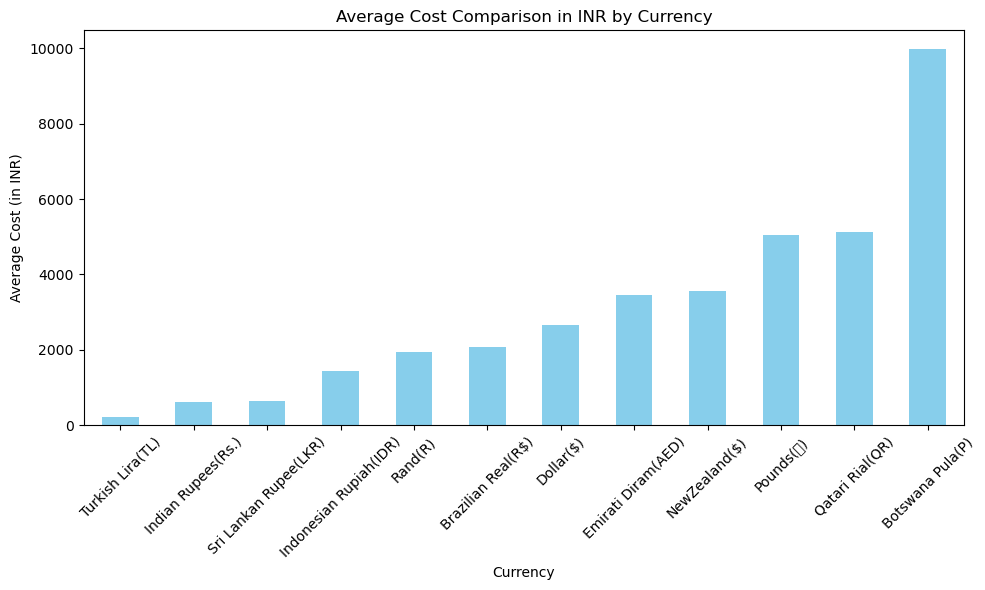

In [28]:
import matplotlib.pyplot as plt

avg_cost_inr = df.groupby('Currency')['Cost (in INR)'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
avg_cost_inr.plot(kind='bar', color='skyblue')
plt.xlabel('Currency')
plt.ylabel('Average Cost (in INR)')
plt.title('Average Cost Comparison in INR by Currency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
df_country = pd.read_excel(r"C:\Users\Sanjeevi\Downloads\Country-Code.xlsx")

In [30]:
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [64]:
df_merge = pd.merge(df,df_country, how = 'left', on =  'Country')


In [65]:
df_merge.drop(columns=['Country Code'], inplace = True)

In [51]:
df_merge

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cost (in INR),Country
0,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,No,No,No,3,4.8,Dark Green,Excellent,314,6831.00,Phillipines
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,No,No,No,3,4.5,Dark Green,Excellent,591,7452.00,Phillipines
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,No,No,No,4,4.4,Green,Very Good,270,24840.00,Phillipines
3,6318506,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,4,4.9,Dark Green,Excellent,365,9315.00,Phillipines
4,6314302,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,No,No,No,4,4.8,Dark Green,Excellent,229,9315.00,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,5915730,Naml郾 Gurme,Istanbul,"Kemanke侓 Karamustafa Pa侓a Mahallesi, R郾ht郾m Ca...",Karak韄y,"Karak韄y, 哿stanbul",28.977392,41.022793,Turkish,80,...,No,No,No,3,4.1,Green,Very Good,788,204.00,Turkey
9538,5908749,Ceviz A埕ac郾,Istanbul,"Ko侓uyolu Mahallesi, Muhittin 盱st韄nda埕 Caddesi,...",Ko侓uyolu,"Ko侓uyolu, 哿stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,...,No,No,No,3,4.2,Green,Very Good,1034,267.75,Turkey
9539,5915807,Huqqa,Istanbul,"Kuru韄e侓me Mahallesi, Muallim Naci Caddesi, No ...",Kuru韄e侓me,"Kuru韄e侓me, 哿stanbul",29.034640,41.055817,"Italian, World Cuisine",170,...,No,No,No,4,3.7,Yellow,Good,661,433.50,Turkey
9540,5916112,A侓侓k Kahve,Istanbul,"Kuru韄e侓me Mahallesi, Muallim Naci Caddesi, No ...",Kuru韄e侓me,"Kuru韄e侓me, 哿stanbul",29.036019,41.057979,Restaurant Cafe,120,...,No,No,No,4,4.0,Green,Very Good,901,306.00,Turkey


In [52]:
df_merge.to_csv('Zomato_Data_Analysis.csv', index = False)